### Cross Correlation Calculation

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
df_kospi = fdr.StockListing("KOSPI")
usdkrw = fdr.DataReader('USD/KRW') # 달러 원화

In [3]:
df_kospi.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1981-04-14,676.70,676.70,676.70,676.70,0.0019
1981-04-15,676.70,676.70,676.70,676.70,0.0000
1981-04-16,676.70,676.70,676.70,676.70,0.0000
1981-04-17,676.75,676.75,676.75,676.75,0.0001
1981-04-20,676.70,676.70,676.70,676.70,-0.0001


In [5]:
# list up companies to look up
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    }

# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item_code in stock_dict.values():
    close = fdr.DataReader(item_code, "2012", "2021")['Close']
    item_list.append(close)
    
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
kospi_IT = pd.concat(item_list, axis=1)
kospi_IT.columns = stock_dict.keys()
kospi_IT = kospi_IT / kospi_IT.iloc[0] # normalize
kospi_IT.head()

,삼성전자,SK하이닉스
Date,,
2012-01-02,1.000000,1.000000
2012-01-03,1.023148,1.008529
2012-01-04,1.000000,1.017058
2012-01-05,0.976852,1.023454
2012-01-06,0.962963,1.040512


In [6]:
df = (kospi_IT.sum(axis=1) / 10 * 100).to_frame(name="kospi_IT")
df['usdkrw'] = usdkrw['Close']
df.head()

,kospi_IT,usdkrw
Date,,
2012-01-02,20.000000,1155.15
2012-01-03,20.316769,1145.70
2012-01-04,20.170576,1148.35
2012-01-05,20.003060,1156.05
2012-01-06,20.034747,1160.50


### Pearson Correlation

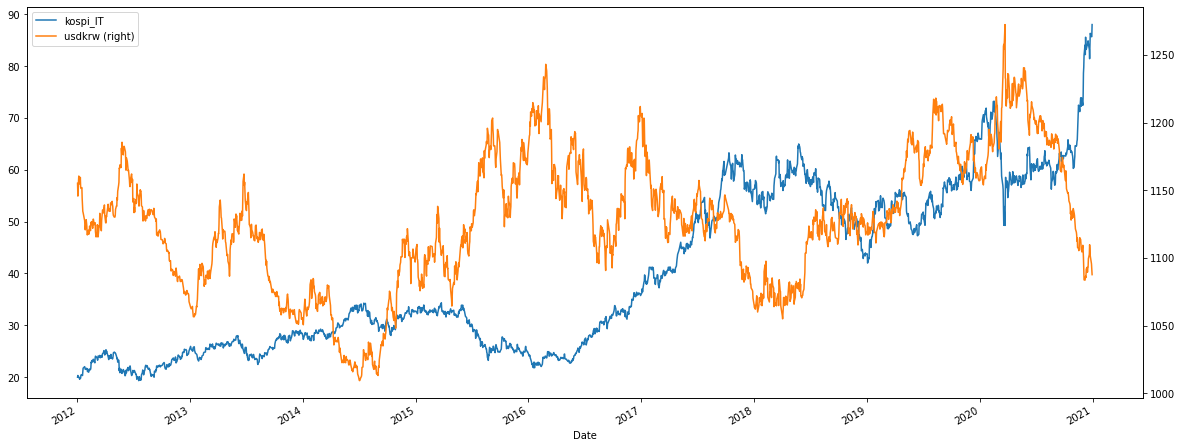

In [7]:
# secondary_y is right part of the y axis
df[["kospi_IT", "usdkrw"]].plot(secondary_y="usdkrw", figsize=(20,8))
plt.show()

### Cross time Correlation

In [8]:
df

,kospi_IT,usdkrw
Date,,
2012-01-02,20.000000,1155.15
2012-01-03,20.316769,1145.70
2012-01-04,20.170576,1148.35
2012-01-05,20.003060,1156.05
2012-01-06,20.034747,1160.50
...,...,...
2020-12-23,83.679914,1106.65
2020-12-24,86.338348,1101.59
2020-12-28,85.688917,1095.60


In [9]:
# this shifts both of the columns. Not a good idea.
df.shift(20)

,kospi_IT,usdkrw
Date,,
2012-01-02,NaN,NaN
2012-01-03,NaN,NaN
2012-01-04,NaN,NaN
2012-01-05,NaN,NaN
2012-01-06,NaN,NaN
...,...,...
2020-12-23,72.283227,1106.21
2020-12-24,73.869541,1105.57
2020-12-28,73.706270,1104.43


In [10]:
# shift function does not change the original dataframe
df

,kospi_IT,usdkrw
Date,,
2012-01-02,20.000000,1155.15
2012-01-03,20.316769,1145.70
2012-01-04,20.170576,1148.35
2012-01-05,20.003060,1156.05
2012-01-06,20.034747,1160.50
...,...,...
2020-12-23,83.679914,1106.65
2020-12-24,86.338348,1101.59
2020-12-28,85.688917,1095.60


In [11]:
# work on a copy of the dataframe
df_test = df.copy()
df_test

,kospi_IT,usdkrw
Date,,
2012-01-02,20.000000,1155.15
2012-01-03,20.316769,1145.70
2012-01-04,20.170576,1148.35
2012-01-05,20.003060,1156.05
2012-01-06,20.034747,1160.50
...,...,...
2020-12-23,83.679914,1106.65
2020-12-24,86.338348,1101.59
2020-12-28,85.688917,1095.60


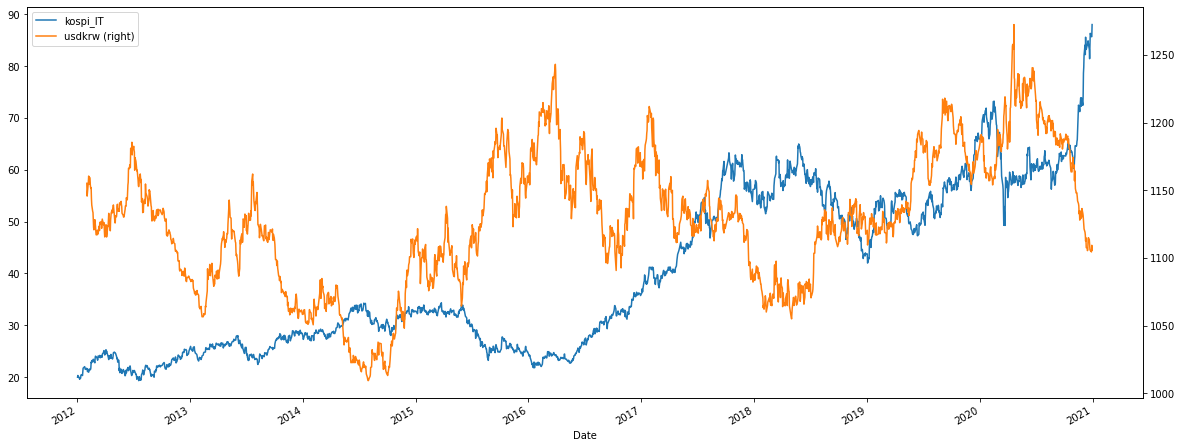

In [12]:
# shifts usdkrw by 20 days, overwrite the existing data
df_test['usdkrw'] = df_test['usdkrw'].shift(20)

# plot the shifted usdkrw
df_test[["kospi_IT", "usdkrw"]].plot(secondary_y="usdkrw", figsize=(20,8))
plt.show()

In [13]:
# original dataset's pearson correlation
df.corr()

,kospi_IT,usdkrw
kospi_IT,1.000000,0.218226
usdkrw,0.218226,1.000000


In [14]:
# shows time shifted correlation and you can check for the meaningful difference
df_test.corr()

,kospi_IT,usdkrw
kospi_IT,1.000000,0.249186
usdkrw,0.249186,1.000000


In [15]:
def correlation_from_shift(df, shift_days):
  """
  find for the optimal shift to maximize the correlation coefficient, make it into a function for repetitive testing
  returns correlation coefficient
  reference: https://www.kaggle.com/dedecu/cross-correlation-time-lag-with-pandas
  """
  # copy dataframe
  df_temp = df.copy()
  
  # shift usdkrw column
  df_temp['usdkrw'] = df_temp['usdkrw'].shift(shift_days)
  
  # extract correlation coefficient from usdkrw and kospi_IT
  return df_temp['usdkrw'].corr(df_temp['kospi_IT'])

# initial list of correlation coefficients
list_correlation = []

TEST_TIME_SPAN = 3650 # 10 years, 3650 days

for i in range(0, TEST_TIME_SPAN):
  # add correlations
  list_correlation.append(correlation_from_shift(df, i))

# find the maximum correlation
max_correlation = max(list_correlation)
max_correlation


/Users/noopy/.pyenv/versions/3.8.3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/noopy/.pyenv/versions/3.8.3/envs/quant/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


0.820172217146348

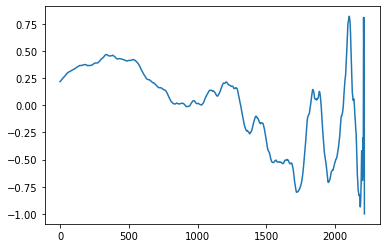

In [16]:
# But I am not sure whether this is caused from cutting time

# plot the list_correlation
plt.plot(list_correlation)

In [17]:
# Record the days of maximum correlation days
list_correlation = []

TEST_TIME_SPAN = 3650 # 10 years, 3650 days

for i in range(0, TEST_TIME_SPAN):
  # add correlations
  list_correlation.append([i,correlation_from_shift(df, i)])

# convert list_correlation into a dataframe
df_correlation = pd.DataFrame(list_correlation, columns=['shift_days', 'correlation'])
df_correlation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   shift_days   3650 non-null   int64  
 1   correlation  2214 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 57.2 KB


In [18]:
# get maximum correlations and shifted days accompanied from the dataframe
max_correlation = df_correlation.loc[df_correlation['correlation'].idxmax()]
max_correlation

shift_days     2103.000000
correlation       0.820172
Name: 2103, dtype: float64

In [19]:
# get 50 maximum correlations and shifted days accompanied from the dataframe
max_correlation_50 = df_correlation.loc[df_correlation['correlation'].nlargest(50).index]
max_correlation_50

,shift_days,correlation
2103,2103,0.820172
2102,2102,0.818787
2101,2101,0.816397
2104,2104,0.815289
2100,2100,0.808587
2207,2207,0.808510
2105,2105,0.805607
2211,2211,0.805463
2099,2099,0.798953
2106,2106,0.797804


,kospi_IT,usdkrw
kospi_IT,1.000000,0.808587
usdkrw,0.808587,1.000000


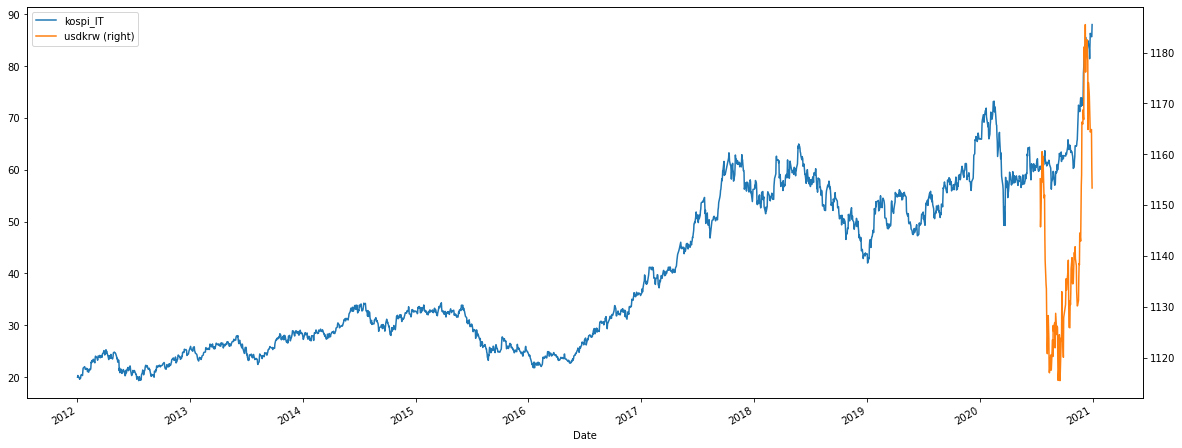

In [23]:
# shift usdkrw 2100 days and plot it with kospi_IT
df_temp = df.copy()
df_temp['usdkrw'] = df_temp['usdkrw'].shift(2100)
df_temp[['kospi_IT', 'usdkrw']].plot(secondary_y='usdkrw', figsize=(20,8))

# display correlation
df_temp.corr()

# comparison is 7 years apart, thus not significant finding

,kospi_IT,usdkrw
kospi_IT,1.000000,0.467949
usdkrw,0.467949,1.000000


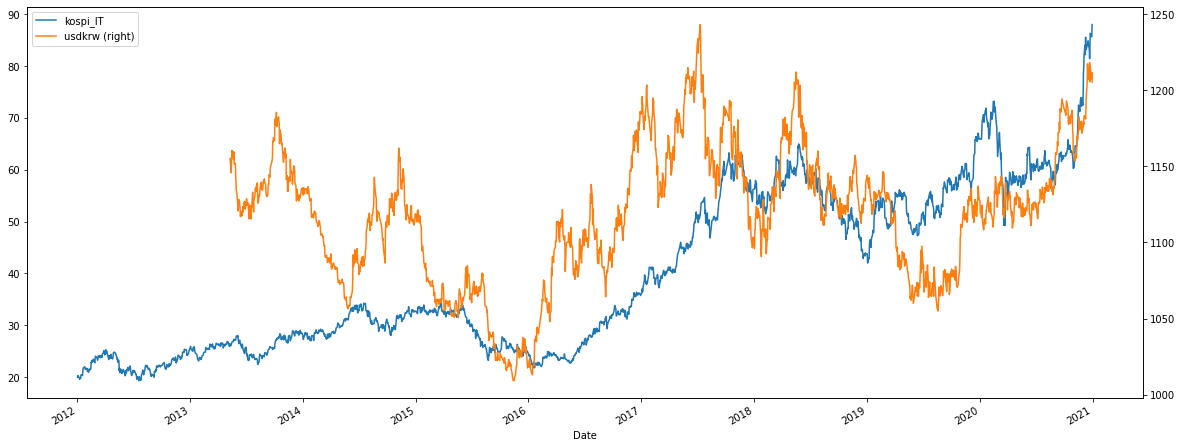

In [24]:
# shift usdkrw 337 days and plot it with kospi_IT
df_temp = df.copy()
df_temp['usdkrw'] = df_temp['usdkrw'].shift(337)
df_temp[['kospi_IT', 'usdkrw']].plot(secondary_y='usdkrw', figsize=(20,8))

# display correlation
df_temp.corr()

,kospi_IT,usdkrw
kospi_IT,1.000000,0.476241
usdkrw,0.476241,1.000000


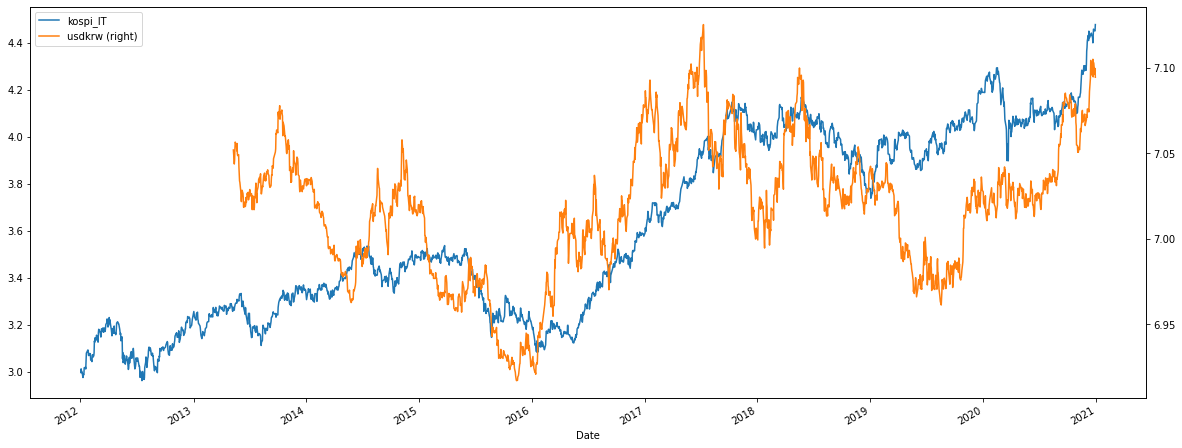

In [26]:
""" further changes? log-scale? """
# https://stats.stackexchange.com/questions/127121/do-logs-modify-the-correlation-between-two-variables
# log scale columns
df_log = df.copy()
df_log['kospi_IT'] = np.log(df_log['kospi_IT'])
df_log['usdkrw'] = np.log(df_log['usdkrw'])

# shift usdkrw 337 days and plot df_log
df_temp = df_log.copy()
df_temp['usdkrw'] = df_temp['usdkrw'].shift(337)
df_temp[['kospi_IT', 'usdkrw']].plot(secondary_y='usdkrw', figsize=(20,8))
df_temp.corr()